/home/maria/RainbowMouse/umapvenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/maria/RainbowMouse/umapvenv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/maria/RainbowMouse/umapvenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


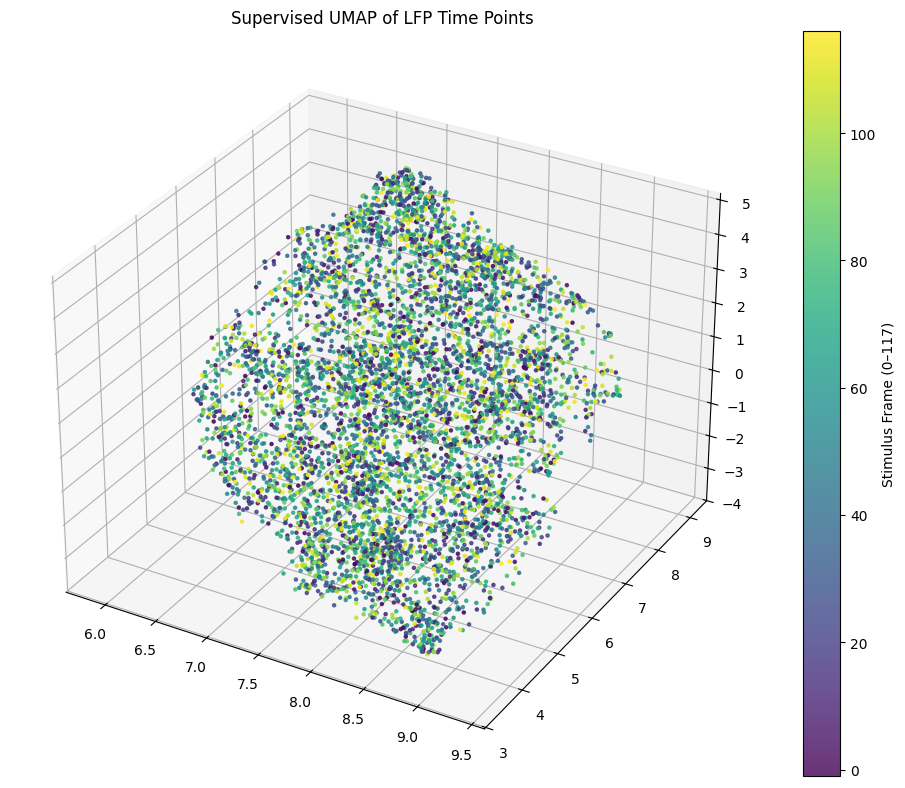

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
from dotenv import load_dotenv

# === Load environment ===
load_dotenv()
cache_path = os.environ.get("RAINBOW_MOUSE_CACHE")

# === Load data ===
lfp = np.load(f"{cache_path}/lfp_multi.npy")         # [95, 5900]
frames = np.load(f"{cache_path}/frames_multi.npy") - 1  # [5900], values in 0–117
vit_embeddings = np.load(f"{cache_path}/vit_embeddings.npy")  # [118, 192]

# === Clean and normalize ===
lfp[np.isnan(lfp)] = np.random.normal(0, 1e-6, size=np.isnan(lfp).sum())

# Transpose to [time, channels]
lfp = lfp.T  # [5900, 95]

# Standardize
lfp = StandardScaler().fit_transform(lfp)

# === Supervised UMAP ===
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=3,
    random_state=42
)

embedding = reducer.fit_transform(lfp, y=frames)

# === Plot ===
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
                c=frames, cmap='viridis', s=5, alpha=0.8)
plt.colorbar(sc, label="Stimulus Frame (0–117)")
ax.set_title("Supervised UMAP of LFP Time Points")
plt.tight_layout()
plt.show()


/home/maria/RainbowMouse/umapvenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/maria/RainbowMouse/umapvenv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


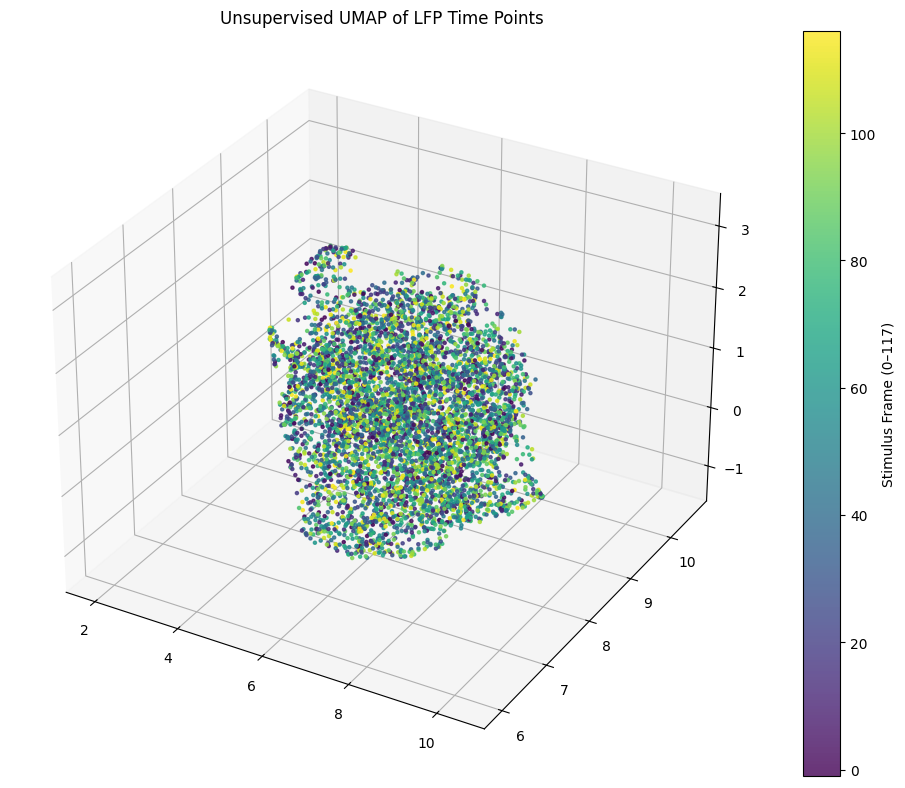

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
from dotenv import load_dotenv

# === Load environment ===
load_dotenv()
cache_path = os.environ.get("RAINBOW_MOUSE_CACHE")

# === Load data ===
lfp = np.load(f"{cache_path}/lfp_multi.npy")         # [95, 5900]
frames = np.load(f"{cache_path}/frames_multi.npy") - 1  # [5900], 0–117
vit_embeddings = np.load(f"{cache_path}/vit_embeddings.npy")  # [118, 192]

# === Clean + normalize ===
lfp[np.isnan(lfp)] = np.random.normal(0, 1e-6, size=np.isnan(lfp).sum())
lfp = lfp.T  # [5900, 95]
lfp = StandardScaler().fit_transform(lfp)

# === Unsupervised UMAP ===
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=3,
    random_state=42
)

embedding = reducer.fit_transform(lfp)  # 👈 no `y=frames`

# === Plot 3D embedding, color by frame (for inspection only)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
                c=frames, cmap='viridis', s=5, alpha=0.8)
plt.colorbar(sc, label="Stimulus Frame (0–117)")
ax.set_title("Unsupervised UMAP of LFP Time Points")
plt.tight_layout()
plt.show()
